In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error, mean_absolute_error
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import  OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
# Loads the dataset
dataset_path = '/content/IQ_Dataset.xlsx'
data = pd.read_excel(dataset_path)

# Prints the dataset
print(data.head())

   Age Education_Level  Test_Preparation_Time (hours)    IQ_Score
0   39      Bachelor's                             11   99.483571
1   62      Bachelor's                             10   95.308678
2   52      Bachelor's                              7  105.238443
3   26      Bachelor's                             16  103.615149
4   73        Master's                             13   98.829233


In [ ]:
# Feature selection
X = data.iloc[:, :-1]

# Target variable (IQ Score)
y = data["IQ_Score"]

# Data preprocessing: Checks for missing values
print("\n\nMissing values in dataset:")
print(data.isnull().sum())

# Handle missing values (if any)
if(data.isnull().bool == True):
  X.fillna(X.mean(), inplace=True)
  y.fillna(y.mean(), inplace=True)

# Categorical data (education level) normalization by one hot encode moethod
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])] , remainder= 'passthrough')
X = ct.fit_transform(X)
print(X)

# Numerical data normalization betwqeen 0-1 for age and test preperation time(hours)
X = MinMaxScaler().fit_transform(X[:])
print(X)

# Splitting the dataset into training and testing sets (data preprocessing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)




Missing values in dataset:
Age                              0
Education_Level                  0
Test_Preparation_Time (hours)    0
IQ_Score                         0
dtype: int64
[[ 1.  0.  0.  0. 39. 11.]
 [ 1.  0.  0.  0. 62. 10.]
 [ 1.  0.  0.  0. 52.  7.]
 ...
 [ 1.  0.  0.  0. 54. 13.]
 [ 1.  0.  0.  0. 57.  4.]
 [ 0.  0.  0.  1. 44. 20.]]
[[1.         0.         0.         0.         0.26530612 0.55      ]
 [1.         0.         0.         0.         0.73469388 0.5       ]
 [1.         0.         0.         0.         0.53061224 0.35      ]
 ...
 [1.         0.         0.         0.         0.57142857 0.65      ]
 [1.         0.         0.         0.         0.63265306 0.2       ]
 [0.         0.         0.         1.         0.36734694 1.        ]]


In [ ]:
# Linear Regression Model
print("\nLinear Regression Model...")
start_time = time.time()
Linear_reg = LinearRegression()
Linear_reg.fit(X_train, y_train)
end_time = time.time()
Linear_reg_time = end_time - start_time
print(f"total process time {Linear_reg_time}")

# Predictions of IQ by using Linear Regression
y_pred_Linear_reg = Linear_reg.predict(X_test)

# Evaluate Linear Regression Performance by Regression Metrics
mae_Linear_reg = mean_absolute_error(y_test, y_pred_Linear_reg)
mse_Linear_reg = mean_squared_error(y_test, y_pred_Linear_reg)
rmse_Linear_reg = root_mean_squared_error(y_test, y_pred_Linear_reg)
r2_Linear_reg = r2_score(y_test, y_pred_Linear_reg)

print("\nLinear Regression Performance:")
print(f"Mean Absolute Error: {mae_Linear_reg}")
print(f"Mean Squared Error: {mse_Linear_reg}")
print(f"Root Mean Squared Error: {rmse_Linear_reg}")
print(f"R² Score: {r2_Linear_reg}\n\n")

cv_scores_linear = cross_val_score(Linear_reg, X_train, y_train, cv=5, scoring='r2')

print(f"Cross Validation Linear Regression R^2 Scores: {cv_scores_linear}")
print(f"Cross Validation Linear Regression Mean R^2: {np.mean(cv_scores_linear):.4f}")



Linear Regression Model...
total process time 0.009061336517333984

Linear Regression Performance:
Mean Absolute Error: 6.175474217817472
Mean Squared Error: 66.99674295463223
Root Mean Squared Error: 8.185153813743039
R² Score: 0.6407123508597836


Cross Validation Linear Regression R^2 Scores: [0.58823017 0.64914362 0.61897534 0.5387062  0.65255984]
Cross Validation Linear Regression Mean R^2: 0.6095


In [ ]:
# Random Forest Regressor Model
print("\nRandom Forest Regressor Model...")
start_time = time.time()
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
end_time = time.time()
RF_time = end_time - start_time
print(f"total process time {RF_time}")

# Predictions of IQ by using Random Forest Regressor
y_pred_RF = random_forest.predict(X_test)

# Evaluate Random Forest Regressor Performance by Regression Metrics
mae_RF = mean_absolute_error(y_test, y_pred_RF)
mse_RF = mean_squared_error(y_test, y_pred_RF)
rmse_RF = root_mean_squared_error(y_test, y_pred_RF)
r2_RF = r2_score(y_test, y_pred_RF)

print("\nRandom Forest Regression Performance:")
print(f"Mean Absolute Error: {mae_RF}")
print(f"Mean Squared Error: {mse_RF}")
print(f"Root Mean Squared Error: {rmse_RF}")
print(f"R² Score: {r2_RF}\n\n")


cv_scores_rf = cross_val_score(random_forest, X_train, y_train, cv=5, scoring='r2')

print(f"Cross Validation Random Forest R^2 Scores: {cv_scores_rf}")
print(f"Cross Validation Random Forest Mean R^2: {np.mean(cv_scores_rf):.4f}")


Random Forest Regressor Model...
total process time 0.25537538528442383

Random Forest Regression Performance:
Mean Absolute Error: 4.47701807619424
Mean Squared Error: 40.37762754659523
Root Mean Squared Error: 6.354339269081816
R² Score: 0.7834643560374392


Cross Validation Random Forest R^2 Scores: [0.79766497 0.78818005 0.82864233 0.80341455 0.87100631]
Cross Validation Random Forest Mean R^2: 0.8178


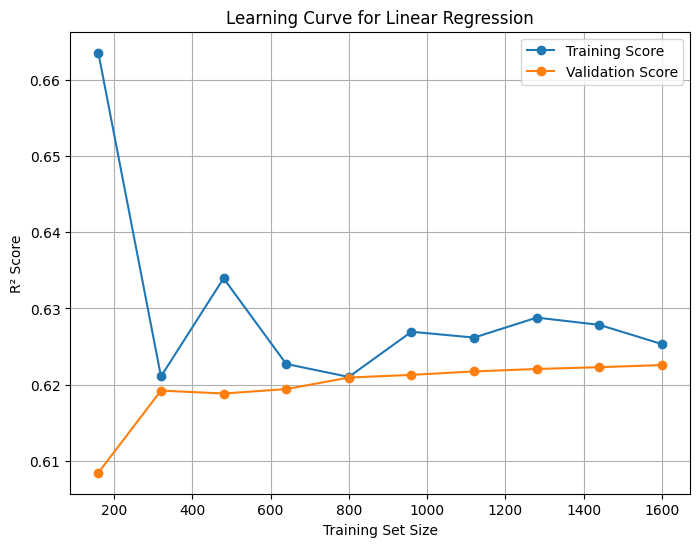

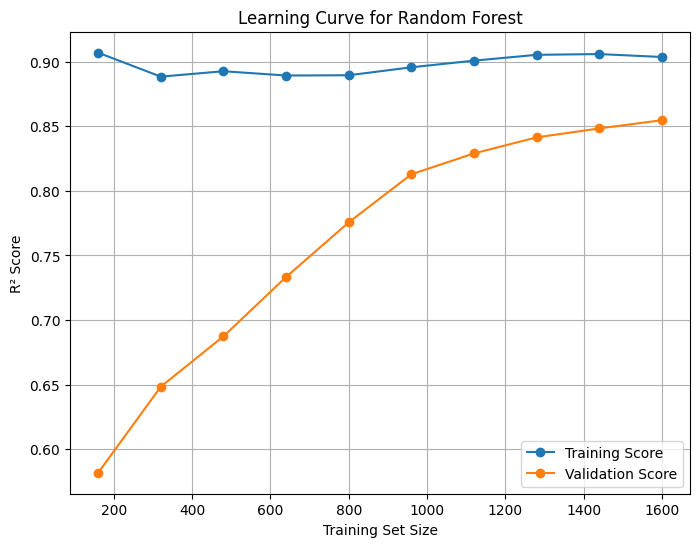

In [ ]:
# Loop for plot learning curve of given models in array
def plot_learning_curve(models):
  for model_name, model in models.items():
      train_sizes, train_scores, test_scores = learning_curve(
          model, X, y, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
      )#for plot a learning curve of models

      train_scores_mean = np.mean(train_scores, axis=1)
      test_scores_mean = np.mean(test_scores, axis=1)

      plt.figure(figsize=(8, 6))
      plt.plot(train_sizes, train_scores_mean, 'o-', label='Training Score')
      plt.plot(train_sizes, test_scores_mean, 'o-', label='Validation Score')
      plt.xlabel('Training Set Size')
      plt.ylabel('R² Score')
      plt.title(f'Learning Curve for {model_name}')
      plt.legend()
      plt.grid(True)
      plt.show()

models = {
    "Linear Regression": Linear_reg,
    "Random Forest": random_forest
}

plot_learning_curve(models)

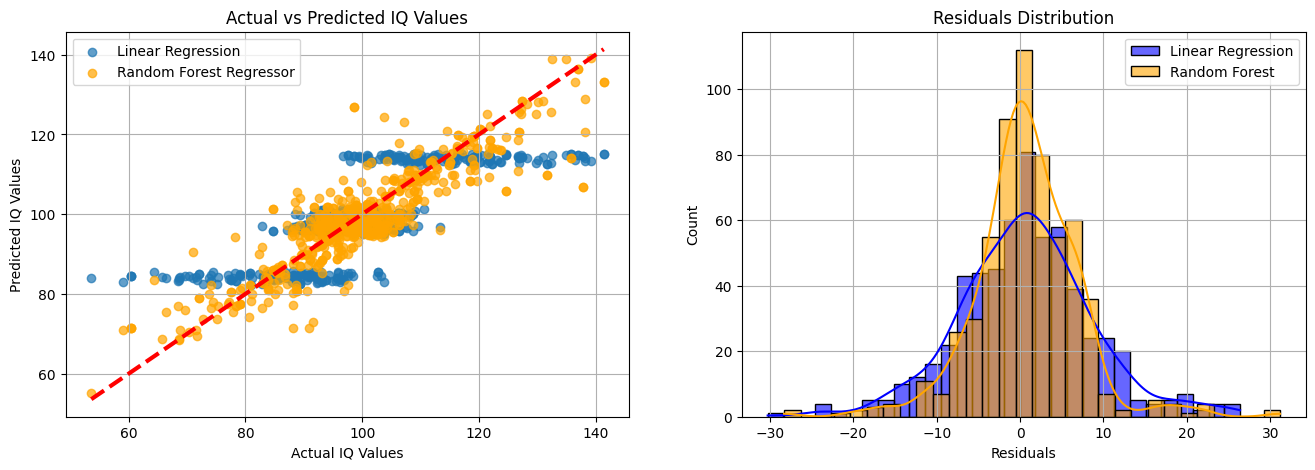

In [ ]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_Linear_reg, alpha=0.7, label="Linear Regression")
plt.scatter(y_test, y_pred_RF, alpha=0.7, label="Random Forest Regressor", color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', linewidth=3)
plt.title("Actual vs Predicted IQ Values")
plt.xlabel("Actual IQ Values")
plt.ylabel("Predicted IQ Values")
plt.legend()
plt.grid(True)


plt.subplot(1, 2, 2)
residuals_linear = y_test - y_pred_Linear_reg
residuals_RF = y_test - y_pred_RF
sns.histplot(residuals_linear, kde=True, bins=30, color='blue', label='Linear Regression', alpha=0.6)
sns.histplot(residuals_RF, kde=True, bins=30, color='orange', label='Random Forest', alpha=0.6)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.legend()
plt.grid(True)

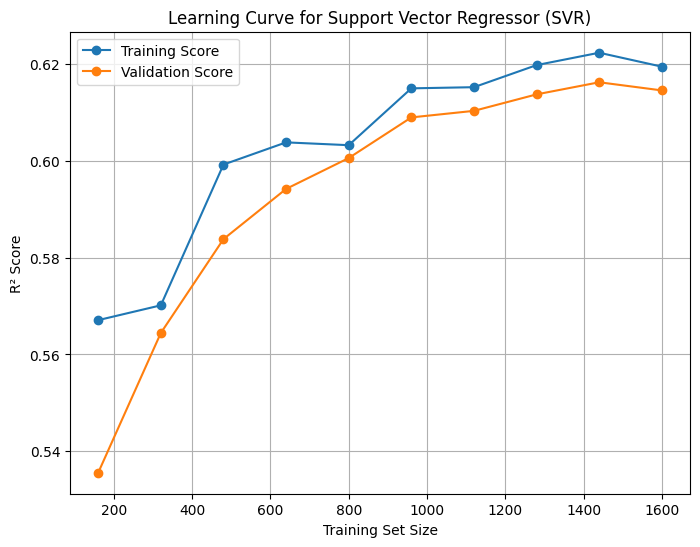

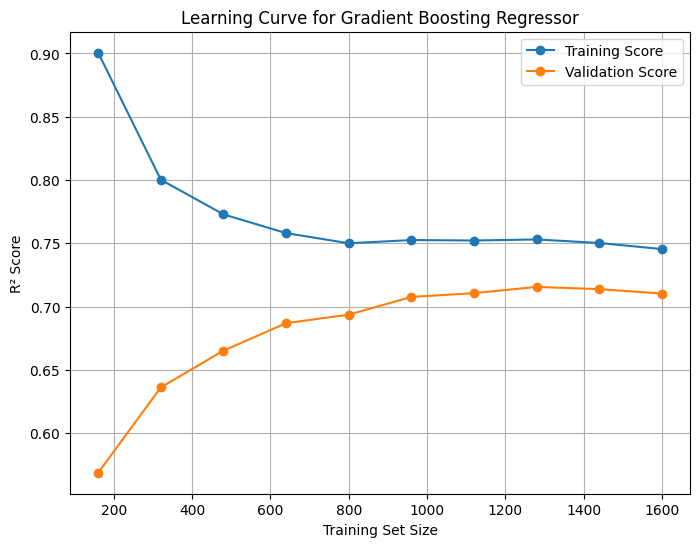

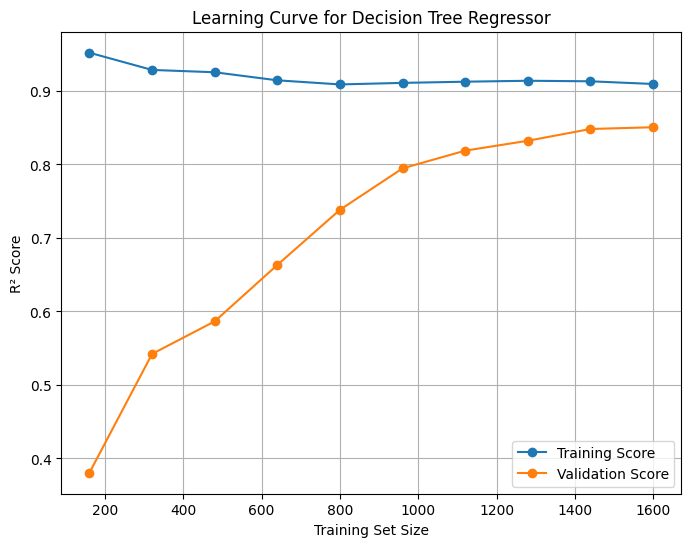

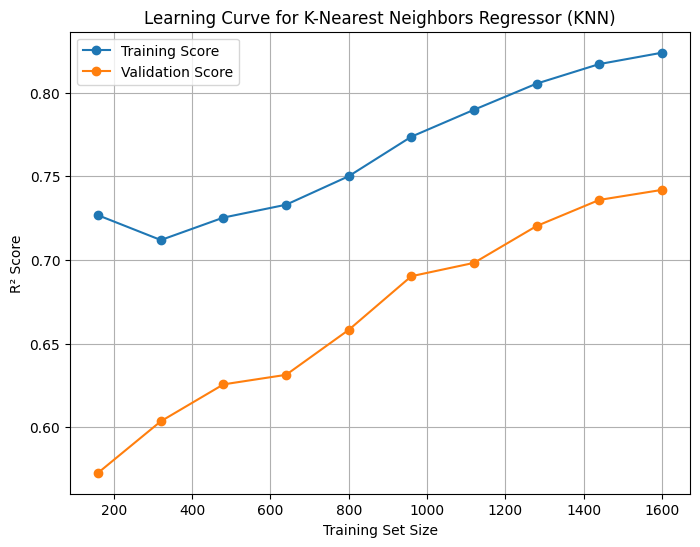


Training Support Vector Regressor (SVR):
Support Vector Regressor (SVR) Performance:
  Mean Absolute Error: 6.234284583561225
  Mean Squared Error: 72.68358805801753
  Root Mean Squared Error: 8.525467028733237
  R² Score: 0.6102151487852969
  Training Time: 0.1172 seconds

Training Gradient Boosting Regressor:
Gradient Boosting Regressor Performance:
  Mean Absolute Error: 5.7240219834826975
  Mean Squared Error: 57.21162354080038
  Root Mean Squared Error: 7.56383656227449
  R² Score: 0.6931876264583694
  Training Time: 0.1283 seconds

Training Decision Tree Regressor:
Decision Tree Regressor Performance:
  Mean Absolute Error: 4.151409563614174
  Mean Squared Error: 40.044276856027516
  Root Mean Squared Error: 6.3280547450245335
  R² Score: 0.7852520367614776
  Training Time: 0.0031 seconds

Training K-Nearest Neighbors Regressor (KNN):
K-Nearest Neighbors Regressor (KNN) Performance:
  Mean Absolute Error: 5.630405722430431
  Mean Squared Error: 57.57312650553538
  Root Mean Squa

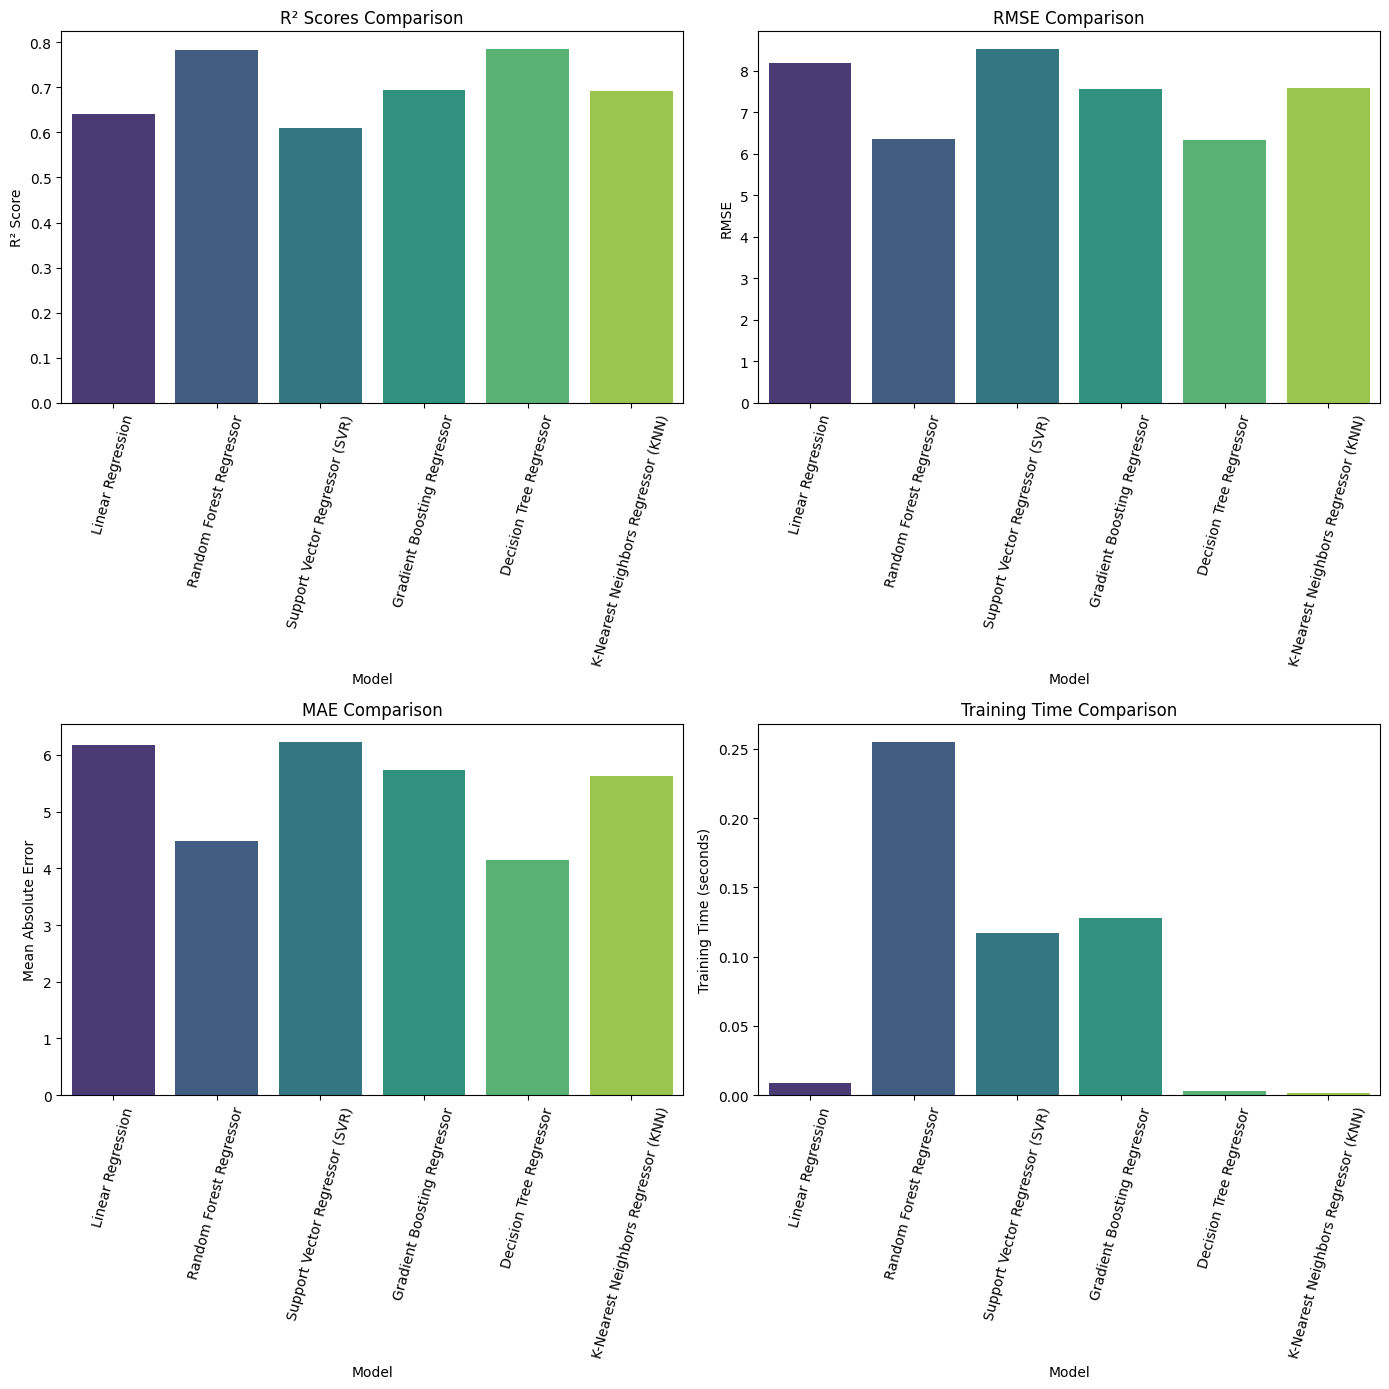

In [ ]:
#assaigning evaluating scores from previous training process
performance = {
    "Model": ["Linear Regression", "Random Forest Regressor"],
    "MAE": [mae_Linear_reg, mae_RF],
    "MSE": [mse_Linear_reg, mse_RF],
    "RMSE": [rmse_Linear_reg, rmse_RF],
    "R²": [r2_Linear_reg, r2_RF],
    "Training Time (s)": [Linear_reg_time, RF_time]
}


# Train other Regression Models
other_models = {
    "Support Vector Regressor (SVR)": SVR(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "K-Nearest Neighbors Regressor (KNN)": KNeighborsRegressor()
}

# Learning curve of other models
plot_learning_curve(other_models)

# Loop for evaluate performance of other Regression Models like Random Forest Reg. and Linear Reg.
for model_name, model in other_models.items():
    print(f"\nTraining {model_name}:")
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluation Metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Storing results
    performance["Model"].append(model_name)
    performance["MAE"].append(mae)
    performance["MSE"].append(mse)
    performance["RMSE"].append(rmse)
    performance["R²"].append(r2)
    performance["Training Time (s)"].append(training_time)

    # Printing results
    print(f"{model_name} Performance:")
    print(f"  Mean Absolute Error: {mae}")
    print(f"  Mean Squared Error: {mse}")
    print(f"  Root Mean Squared Error: {rmse}")
    print(f"  R² Score: {r2}")
    print(f"  Training Time: {training_time:.4f} seconds")

# Converting performance list to data for
performance_df = pd.DataFrame(performance)

# Display the performance comparison
print("\nPerformance Comparison:")
print(f"{performance_df} \n\n\n")

# Visual Performance Metrics Comparisons
plt.figure(figsize=(14, 14))

# R² Scores Comparison
plt.subplot(2, 2, 1)
sns.barplot(x="Model", y="R²", data=performance_df, hue="Model", palette="viridis")
plt.title("R² Scores Comparison")
plt.xticks(rotation=75)
plt.ylabel("R² Score")

# RMSE Comparison
plt.subplot(2, 2, 2)
sns.barplot(x="Model", y="RMSE", data=performance_df, hue="Model", palette="viridis")
plt.title("RMSE Comparison")
plt.xticks(rotation=75)
plt.ylabel("RMSE")

# MAE Comparison
plt.subplot(2, 2, 3)
sns.barplot(x="Model", y="MAE", data=performance_df, hue="Model", palette="viridis")
plt.title("MAE Comparison")
plt.xticks(rotation=75)
plt.ylabel("Mean Absolute Error")

# Training Time Comparison
plt.subplot(2, 2, 4)
sns.barplot(x="Model", y="Training Time (s)", data=performance_df, hue="Model", palette="viridis")
plt.title("Training Time Comparison")
plt.xticks(rotation=75)
plt.ylabel("Training Time (seconds)")

plt.tight_layout()
plt.show()